<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A513%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


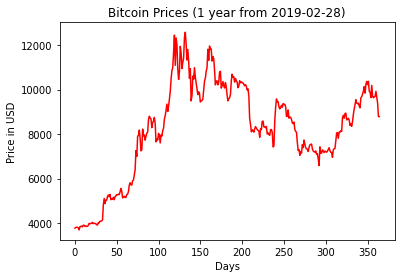

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

#그래프로 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]);print(X[-1],Y[-1])

Epoch 1/200
250/250 - 3s - loss: 1463.7151 - mae: 1463.7151 - val_loss: 342.3717 - val_mae: 342.3717 - 3s/epoch - 11ms/step
Epoch 2/200
250/250 - 2s - loss: 530.5036 - mae: 530.5036 - val_loss: 367.4349 - val_mae: 367.4349 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 546.9344 - mae: 546.9344 - val_loss: 425.2100 - val_mae: 425.2100 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 543.0186 - mae: 543.0186 - val_loss: 462.9191 - val_mae: 462.9191 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 - 2s - loss: 572.9598 - mae: 572.9598 - val_loss: 362.0613 - val_mae: 362.0613 - 2s/epoch - 7ms/step
Epoch 6/200
250/250 - 2s - loss: 555.0241 - mae: 555.0241 - val_loss: 332.6515 - val_mae: 332.6515 - 2s/epoch - 7ms/step
Epoch 7/200
250/250 - 2s - loss: 498.9630 - mae: 498.9630 - val_loss: 367.6028 - val_mae: 367.6028 - 2s/epoch - 7ms/step
Epoch 8/200
250/250 - 2s - loss: 523.8048 - mae: 523.8048 - val_loss: 334.0135 - val_mae: 334.0135 - 2s/epoch - 7ms/step
Epoch 9/200
250/250 - 2s - lo

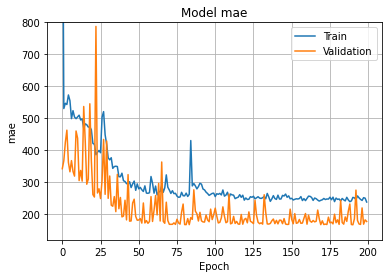

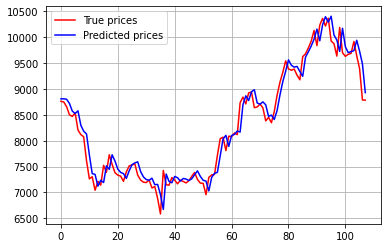

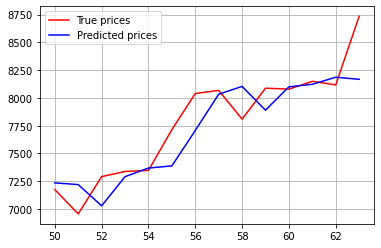

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

#다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()
#print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# #그래프로 확인
# plt.plot(seq,color='red')
# plt.title('Bitcoin Prices (1 year from 2019-02-28)')
# plt.xlabel('Days');plt.ylabel('Price in USD')
# plt.show()

#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)

#훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

#LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

#LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

#예측수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

#학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#예측결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

#일부 구간 확대
x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'],loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 3s - loss: 1412.6525 - mae: 1412.6525 - val_loss: 449.2576 - val_mae: 449.2576 - 3s/epoch - 11ms/step
Epoch 2/200
250/250 - 2s - loss: 539.7375 - mae: 539.7375 - val_loss: 325.6729 - val_mae: 325.6729 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 608.5052 - mae: 608.5052 - val_loss: 435.4201 - val_mae: 435.4201 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 491.6924 - mae: 491.6924 - val_loss: 377.1824 - val_mae: 377.1824 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 

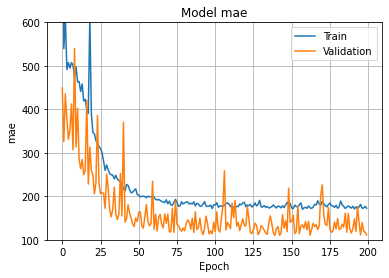

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

#다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy()
#print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# #그래프로 확인
# plt.plot(seq,color='red')
# plt.title('Bitcoin Prices (1 year from 2019-02-28)')
# plt.xlabel('Days');plt.ylabel('Price in USD')
# plt.show()

#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

#훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

#LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

#LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

#예측수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

#학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# #예측결과 시각화
# x_range=range(len(y_test))
# plt.plot(x_range,y_test[x_range],color='red')
# plt.plot(x_range,pred[x_range],color='blue')
# plt.legend(['True prices', 'Predicted prices'], loc='best')
# plt.grid()
# plt.show()

# #일부 구간 확대
# x_range=range(50,64)
# plt.plot(x_range,y_test[x_range],color='red')
# plt.plot(x_range,pred[x_range], color='blue')
# plt.legend(['True prices', 'Predicted prices'],loc='best')
# plt.grid()
# plt.show()

In [ ]:
import music21
import numpy as np

#작은 별 악보를 ABC 표기로 표현
little_star="tinynotation: 4/4 c4 c4 g4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
music21.converter.parse(little_star).show('mid')

note2num={'c':1,'d':2, 'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

dic_siz=10000
sample_siz=512

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

word2id=imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}

for i in range(1,21):
  print(id2word[i],end='/')

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 

Epoch 1/20
391/391 - 3s - loss: 0.4611 - accuracy: 0.7480 - val_loss: 0.2847 - val_accuracy: 0.8810 - 3s/epoch - 7ms/step
Epoch 2/20
391/391 - 3s - loss: 0.1686 - accuracy: 0.9380 - val_loss: 0.3112 - val_accuracy: 0.8722 - 3s/epoch - 7ms/step
Epoch 3/20
391/391 - 3s - loss: 0.0618 - accuracy: 0.9832 - val_loss: 0.3851 - val_accuracy: 0.8668 - 3s/epoch - 7ms/step
Epoch 4/20
391/391 - 2s - loss: 0.0152 - accuracy: 0.9974 - val_loss: 0.4385 - val_accuracy: 0.8671 - 2s/epoch - 6ms/step
Epoch 5/20
391/391 - 3s - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.4865 - val_accuracy: 0.8682 - 3s/epoch - 7ms/step
Epoch 6/20
391/391 - 3s - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.5236 - val_accuracy: 0.8680 - 3s/epoch - 8ms/step
Epoch 7/20
391/391 - 3s - loss: 8.7106e-04 - accuracy: 1.0000 - val_loss: 0.5487 - val_accuracy: 0.8682 - 3s/epoch - 7ms/step
Epoch 8/20
391/391 - 3s - loss: 5.4400e-04 - accuracy: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.8682 - 3s/epoch - 8ms/step
Epoch 9/20
391/3

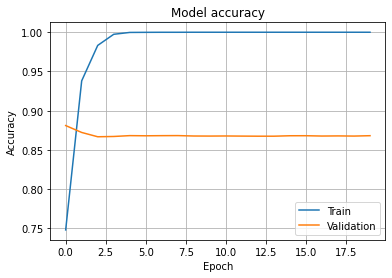

In [ ]:
import matplotlib.pyplot as plt

embed_space_dim=16

#샘플 길이를 sample_size(=512)로 맞춤
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

#신경망 설계와 학습
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

#모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/20
313/313 - 10s - loss: 0.4718 - accuracy: 0.7668 - val_loss: 0.3129 - val_accuracy: 0.8742 - 10s/epoch - 33ms/step
Epoch 2/20
313/313 - 6s - loss: 0.2386 - accuracy: 0.9101 - val_loss: 0.2842 - val_accuracy: 0.8846 - 6s/epoch - 18ms/step
Epoch 3/20
313/313 - 6s - loss: 0.1808 - accuracy: 0.9352 - val_loss: 0.3046 - val_accuracy: 0.8838 - 6s/epoch - 18ms/step
Epoch 4/20
313/313 - 6s - loss: 0.1430 - accuracy: 0.9515 - val_loss: 0.3386 - val_accuracy: 0.8804 - 6s/epoch - 18ms/step
Epoch 5/20
313/313 - 8s - loss: 0.1071 - accuracy: 0.9639 - val_loss: 0.3427 - val_accuracy: 0.8744 - 8s/epoch - 26ms/step
Epoch 6/20
313/313 - 7s - loss: 0.0801 - accuracy: 0.9738 - val_loss: 0.4762 - val_accuracy: 0.8736 - 7s/epoch - 23ms/step
Epoch 7/20
313/313 - 7s - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.5586 - val_accuracy: 0.8682 - 7s/epoch - 23ms/step
정확률은: 87.63200044631958


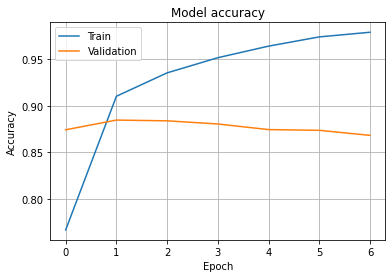

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

dic_siz=10000
sample_siz=512

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)

embed_space_dim=16

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

#신경망 설계와 학습(LSTM포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

#모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은:",res[1]*100)

#학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
import os
import numpy as np
from scipy.spatial import distance

#IMDB원본 데이터 읽기
fname='/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt'
f=open(fname,encoding='utf8')

for line in f:
  print(type(line))
  print(line)
  break

#사전 구축
dictionary={}
for line in f:
  li=line.split()
  word=li[0]
  vector=np.asarray(li[1:],dtype='float32')

#가장 가까운 단어를 찾아주는 함수
def find_closest_words(vector):
  return sorted(dictionary.keys(), key=lambda w: distance.euclidean(dictionary[w],vector))

#가까운 단어 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['oak'])[:5])

#단어 추론
print(find_closest_words(dictionary["seoul"]-dictionary["korea"]+dictionary["spain"])[:5])
print(find_closest_words(dictionary["animal"]-dictionary["lion"]+dictionary["oak"])[:5])
print(find_closest_words(dictionary["queen"]-dictionary["king"]+dictionary["actress"])[:5])

<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062



KeyError: ignored